In [3]:
import torch
import torchvision
import matplotlib.pyplot as plt

mnist_train = torchvision.datasets.MNIST('../data', train=True, download=True)
train_x = mnist_train.data.reshape(-1, 784).float() 
train_y = torch.zeros((mnist_train.targets.shape[0], 10)) 
train_y[torch.arange(mnist_train.targets.shape[0]), mnist_train.targets] = 1 

mnist_test = torchvision.datasets.MNIST('../data', train=False, download=True)
test_x = mnist_test.data.reshape(-1, 784).float() 
test_y = torch.zeros((mnist_test.targets.shape[0], 10)) 
test_y[torch.arange(mnist_test.targets.shape[0]), mnist_test.targets] = 1

In [4]:
class SoftmaxModel:
    def __init__(self):
        self.W = torch.ones([784,10], requires_grad=True)
        self.b = torch.ones([1,10], requires_grad=True)
    # Predictor
    def f(self, x):
        return torch.nn.functional.softmax(x @ self.W + self.b, dim=1)
    
    def accuracy(self, x, y):
        return torch.mean(torch.eq(self.f(x).argmax(1),
        y.argmax(1)).float())

    def loss(self, x, y):
        return torch.nn.functional.cross_entropy(x @ self.W + self.b,y.argmax(1))

In [6]:
model = SoftmaxModel()

optimizer = torch.optim.SGD([model.W, model.b], lr=1)
for epoch in range(1000):
    model.loss(train_x, train_y).backward()  
    optimizer.step() 
    optimizer.zero_grad()  
    
print("W = %s, b = %s, loss = %s, accuracy = %s" % (model.W, model.b, model.loss(train_x, train_y), model.accuracy(train_x, train_y)))

W = tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        ...,
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.]], requires_grad=True), b = tensor([[ 0.4764,  1.4343,  1.8922,  0.7280,  0.9644,  4.4021,  1.0819,  2.2143,
         -3.3762,  0.1827]], requires_grad=True), loss = tensor(3943.3645, grad_fn=<NllLossBackward0>), accuracy = tensor(0.9254)


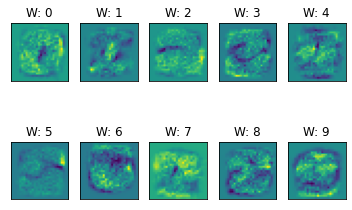

In [14]:
fig = plt.figure('Photos')
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(model.W[:, i].detach().numpy().reshape(28, 28))
    plt.title(f'W: {i}')
    plt.xticks([])
    plt.yticks([])

plt.show()